# Modèle de réseau neuronale

C'est plus simple de faire le modèle sur le notebook pour pouvoir analyser chaque étape avec précision

In [1]:
#Imports

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns #On ne sait jamais que ça serve
import pandas as pd #Même argument

In [ ]:
from alexnet_pytorch import AlexNet
A_model = AlexNet.from_pretrained('alexnet', num_classes=10)

In [3]:
#Insert des données

In [4]:
#Idéalement, il faudrait ajouter les données batch par batch pour ne pas trop faire souffrir la ram

In [5]:
labels_csv = pd.read_csv('DATA\\labels.csv')

In [6]:
for line in labels_csv.values:
    label = line[0]
    name = line[1]
    print(f"Le label est '{label}' et le nom de la vidéo : '{name}'")

Le label est 'Ferme le poing' et le nom de la vidéo : 'video_0.avi'
Le label est 'Ferme le poing' et le nom de la vidéo : 'video_1.avi'
Le label est 'Ferme le poing' et le nom de la vidéo : 'video_2.avi'
Le label est 'Ferme le poing' et le nom de la vidéo : 'video_3.avi'
Le label est 'Ouvre le poing' et le nom de la vidéo : 'video_4.avi'
Le label est 'Ouvre le poing' et le nom de la vidéo : 'video_5.avi'
Le label est 'Ouvre le poing' et le nom de la vidéo : 'video_6.avi'
Le label est 'Ouvre le poing' et le nom de la vidéo : 'video_7.avi'
Le label est 'Ouvre le poing' et le nom de la vidéo : 'video_8.avi'
Le label est 'Clap' et le nom de la vidéo : 'video_9.avi'
Le label est 'Clap' et le nom de la vidéo : 'video_10.avi'
Le label est 'Clap' et le nom de la vidéo : 'video_11.avi'
Le label est 'Swipe gauche' et le nom de la vidéo : 'video_12.avi'
Le label est 'Swipe gauche' et le nom de la vidéo : 'video_13.avi'
Le label est 'Swipe gauche' et le nom de la vidéo : 'video_14.avi'
Le label es

In [7]:
X = []
y = []
for line in labels_csv.values:
    #X.append()
    pass

In [30]:
a_vid = cv2.VideoCapture('DATA\\Videos\\video_0.avi')

In [34]:
#a_vid.get(cv2.CAP_PROP_POS_MSEC) #donne la position dans la vidéo en ms, on est à 25 fps donc chaque image est espacée de 40ms


0.0

In [9]:
ret,frame = a_vid.read(100)

In [10]:
path = 'C:\\Users\\william\\Videos\\Pour seconde du jour\\20210207_124533.mp4'
path = 'DATA\\Videos\\video_0.avi'

In [36]:
cap = cv2.VideoCapture(path)
imgs = []

while(cap.isOpened()):
    #print('inside')
    ret, frame = cap.read()
    
    if ret: #Sinon ça plante quand il n'y a plus d'images
        
        frame_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        #Isoler les images
        imgs.append(frame_RGB)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
else:
    print('Erreur')
    
print('out')
cap.release()
#cv2.destroyAllWindows() #Slmt si j'affiche

out


In [84]:
def get_imgs_from_path(path,fps = -1):
    '''
    Retourne une liste d'images. La liste d'image a le nombre de fps voulu
    '''
    cap = cv2.VideoCapture(path)
    fps_actu = cap.get(cv2.CAP_PROP_FPS)
    if fps <= -1: fps = fps_actu #Je peux ne pas donner de fps et ça va prendre le nombre d'fps initial
    ecart_voulu = int(1000/fps)
    ecart_initial = int(1000/fps_actu)
    imgs = []
    
    
    while(cap.isOpened()):
        ret, frame = cap.read()

        if ret: #Sinon ça plante quand il n'y a plus d'images
            
            #Bonne couleur
            frame_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            
            #Récupère seulement certaines images
            t_ms = cap.get(cv2.CAP_PROP_POS_MSEC)
            modulo = t_ms%ecart_voulu
            if modulo < ecart_initial:
                #Isoler les images
                imgs.append(frame_RGB)
            
        else: #Va jusqu'au bout de la vidéo
            break
    else:
        print("Le fichier n'a pas pu être ouvert")
    cap.release()
    
    return imgs
    
    

In [89]:
imgs = get_imgs_from_path('DATA\\Videos\\video_0.avi',5)

In [ ]:
for img in imgs:
    plt.imshow(img)

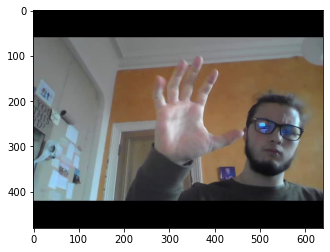

In [91]:
plt.imshow(imgs[2])

In [16]:
def reduce_fps(imgs,ratio = 6):
    '''
    imgs est une liste d'images
    1/ratio est le nombre d'images qu'on garde
    '''
    new_imgs = []
    for i,img in enumerate(imgs):
        if i % ratio == 0:
            new_imgs.append(img)
    return new_imgs    

In [19]:
new_vid = reduce_fps(imgs,6)

In [20]:
len(new_vid)

10

10


In [80]:
#Test d'une fonction qui permet de récupérer uniquement certaines images
ms = 1000
fps = 17
fps_voulu = 17
ecart_ms = int(ms/fps)
ecart_voulu = int(ms/fps_voulu)
for i in range (0,ms,ecart_ms):
    modulo = i%ecart_voulu
    print(modulo)
    if modulo < ecart_ms:
        print("choisi")


0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
0
choisi
